<a href="https://colab.research.google.com/github/temaaako/ml-exercise/blob/main/MLCourseKozhevnikovArtem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langdetect

import pandas as pd
import re
import matplotlib.pyplot as plt
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Загрузка NLTK ресурсов
nltk.download('stopwords')
nltk.download('wordnet')

# Загрузка данных
df = pd.read_csv('train.csv')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Определение функции для определения языка
def is_english(text):
    try:
        return detect(text) == 'en'
    except Exception as e:
        return False

# Очистка и фильтрация данных
df['is_english'] = df['user_review'].apply(is_english)
df = df[df['is_english']]

# Функция предобработки текста
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['processed_review'] = df['user_review'].apply(preprocess_text)

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X = df['processed_review']
y = df['user_suggestion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текстов
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Обучение модели
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Оценка модели
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вывод таблицы с примерами и метриками
results_df = pd.DataFrame({
    'Review': X_test,
    'True Label': y_test,
    'Predicted Label': y_pred
}).reset_index(drop=True)
print(results_df.sample(10))

# Вывод отчёта по классификации
report = classification_report(y_test, y_pred)
print(report)




Accuracy: 0.77
                                                 Review  True Label  \
378   early access reviewi doubt saw steam tried pax...           1   
2395  early access reviewi love game wtf wrong price...           0   
299   elder scroll legend game based universe famous...           1   
1381  one friend mine always think catch incoming bo...           0   
2862  early access reviewthere million one complaint...           1   
909   refreshing new take infestation title thoughtp...           0   
1980  really like game ive liked since orignally rel...           1   
766   gave try sadly old bad world tank game good th...           0   
2343  cease fire fight vanuenemy lightning areagunsh...           1   
1533  wth happened update find server 3minutes minim...           0   

      Predicted Label  
378                 1  
2395                0  
299                 1  
1381                1  
2862                1  
909                 0  
1980                1  
766        

In [ ]:
# Преобразование предсказаний и истинных значений в DataFrame
results_df = pd.DataFrame({
    'Review': X_test,
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Сброс индекса для красивого вывода
results_df = results_df.reset_index(drop=True)

# Вывод таблицы с 20 случайными примерами
pd.set_option('display.max_colwidth', None)  # Установка для отображения полного текста отзыва
display_df = results_df.sample(n=20, random_state=42)

display_df

,Review,True Label,Predicted Label
1775,guy saying p2wits noti 9 spcspecial character 50 green magic ball invested nothing gameits skilland mute everyone toxicat higher level youll find better people,1,1
51,early access reviewfirst impression reviewnice graphicgameplay fun fast paced slow eithereach ship playstyle thing good compared othersships also quite balanced imostrategical action rewarded nicelymatchmaking illogicaldoesnt feel like cash grabber currentlylimited 3d manouver ship yaw pitch cannot rollparty 2man basedui feel like refined cannot cancel matchmaking searchsome asiabased player might high ping occasional lagging even searching game asia matchmaking might thoughbugs technical issue like stuck victory countdown game end might occur since still alphaconclusion like playing world warship inside space conflict twist moba sector game good already played wargaming game world series space conflict warthunder ui control quite similar gameplay fun require teamwork strategy reflex mindless action high ping lagging didnt really affect could contribute victory since ship autotargeting weapon ability ship movement fast could still play fine played conquest gamemode map divided instanced sector rather one big open map could still see happened sector see teammate could see though moving sector done jumping ability forward base sector home base make generally slow paced gameplay inside sector making faster reinforce pushed friendly sector helping push faster,1,1
194,played viewed futuristic war simulator massive amount player talking might well enhance realism grab bunch military code slang thisgs due massive amount player youu need good computer run game perfectly give game 810,1,1
2755,wowthis game made dayz look amazing survival aspect many gun basically deathmatch thats nothing nothing le saving grace deathmatch guess performs well unlike zombie open world thing get 60fps ultra r9 390 i5 guess looking 100 player open world deathmatch zombie chucked fill ya boot loooking survival game look else maby h1z1 dayz fair genre game struggling done well,0,1
2019,love love love whispering death who lvl 20 deadly nadder who lvl 18 many cool feature suit httyd need love dragon especially httyd one like toothless opinon p want friend love dragonsdinosaurs free friend,1,1
2441,instead writing massive rant much enjoy game instead point 3 thing people say dont like dont think point hold much water1 pay money play konami want money dont pay anything lot gameplay grinding earn card ive playing almost quite ive paid money cause wanted cause felt like paytowin free game are2 event suck admit event lackluster great opportunity get new card unlock characters3 new card theyre releasing suck realize many card yugioh card game right know game know card great thats game game great job constantly adding new card try also resently released yubel card super powerful cant say card theyre releasing suckbut end personally love playing thats really matter fun free could want,1,1
2138,buddy spent hour trekking snowy forest hill across river like wadding pool molasses following animal track pile feces didnt seem lead anywhere thats saw giant black bear two hour without seeing another living thing ready make kill scoped aimed heart 1 2 3 pulled trigger perfect synchronicity prepared hungry make first kill license hunt black bearneedless say uninstalled game within minute,0,0
2411,swank animu simulator ever wanted cliche shounen protagonist game game awesome well isas many tell game received lot flak adding unbalanced charactersadd prompting joke luciel didnt randomly throw slash character 2 different peoplethese character able awakened keep enemy combo ever broke pvp causing outrage finally kog responded nerfing new character remaking old one new one arent yet time im writing imma assume gonna balancedthis addresing sorrynotsorry problem pvp even completely pve care anyways game really fun incredibly fun playing friend highly reccomend promise wont let,1,1
9

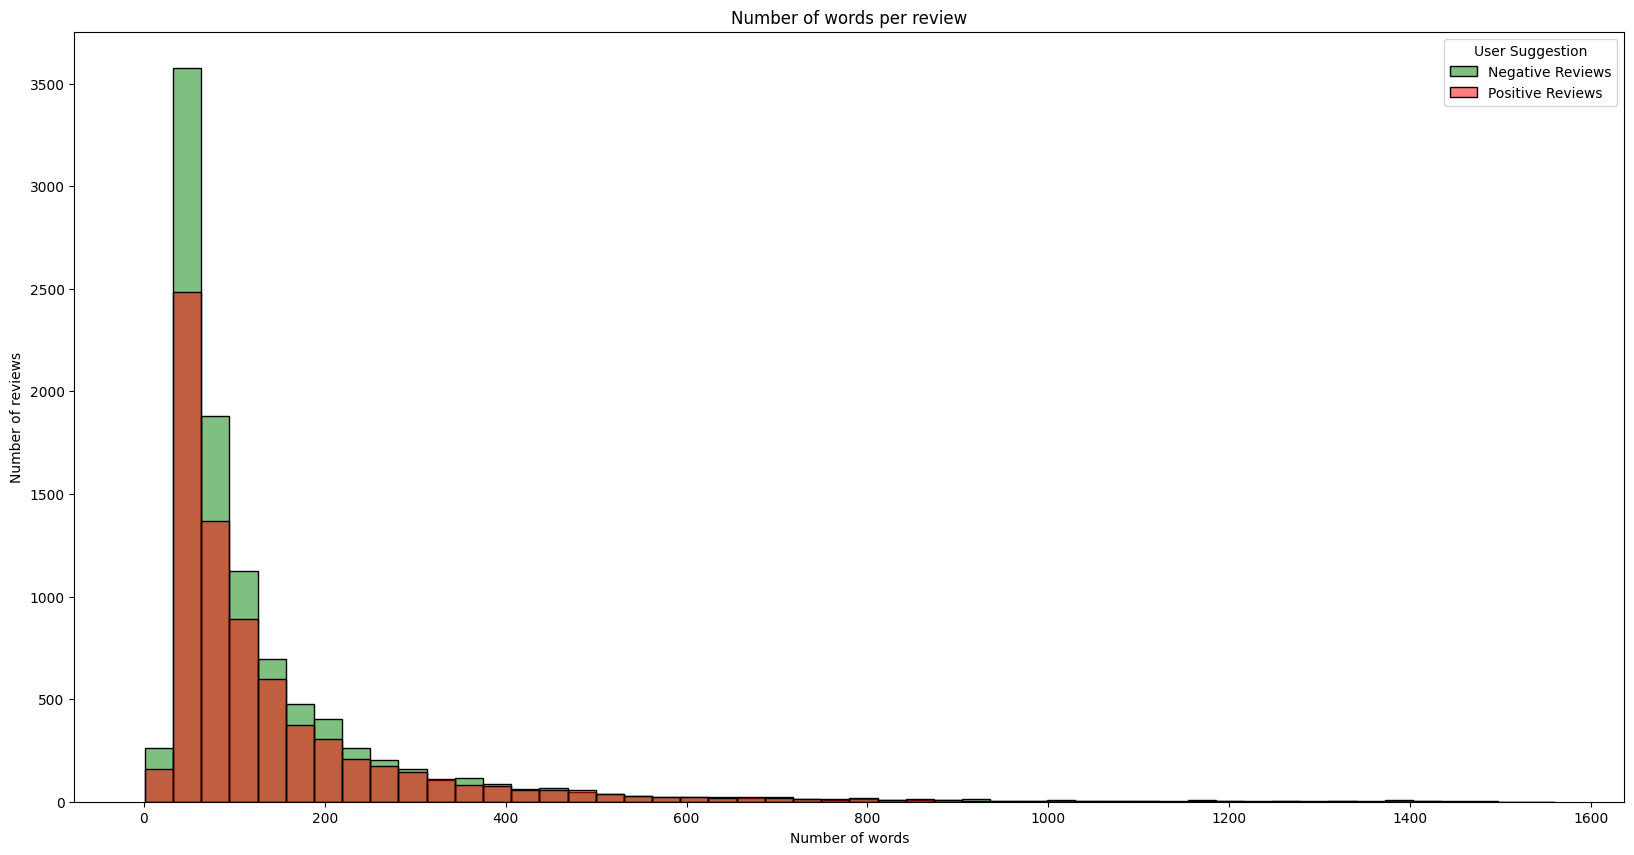

In [ ]:
import seaborn as sns

# Добавление столбца с количеством слов в исходный DataFrame
df['n_words'] = df['user_review'].apply(lambda x: len(x.split()))

# Создание гистограммы с использованием seaborn
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='n_words', hue='user_suggestion', bins=50, kde=False, palette=['red', 'green'], alpha=0.5)
plt.title("Number of words per review")
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.legend(title='User Suggestion', labels=['Negative Reviews', 'Positive Reviews'])
plt.show()



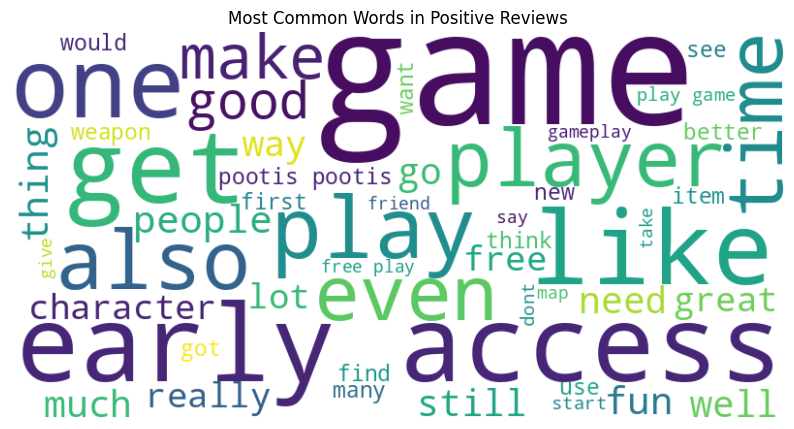

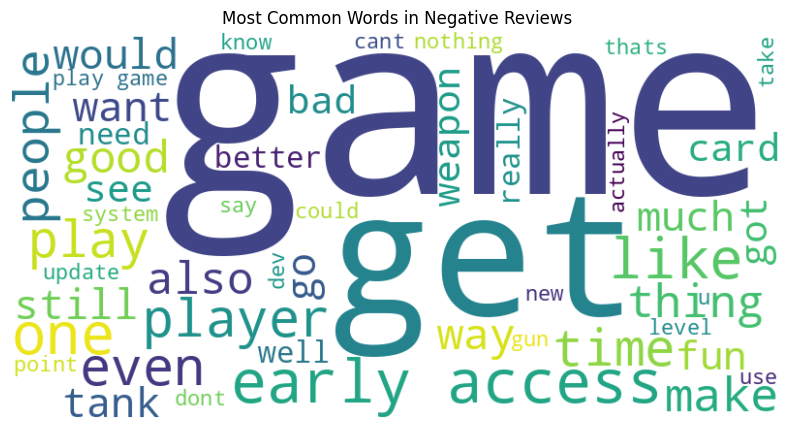

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Функция для создания списка слов из отзывов с учетом их тональности
def create_corpus(target):
    corpus = []

    for review in df[df['user_suggestion'] == target]['processed_review']:
        corpus.extend(review.split())

    return corpus

# Создание списков слов для положительных и отрицательных отзывов
positive_corpus = create_corpus(1)
negative_corpus = create_corpus(0)

# Генерация WordCloud для положительных отзывов
wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=50,
    stopwords=stop_words
).generate(' '.join(positive_corpus))

# Генерация WordCloud для отрицательных отзывов
wordcloud_negative = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=50,
    stopwords=stop_words
).generate(' '.join(negative_corpus))

# Визуализация WordCloud для позитивных отзывов
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

# Визуализация WordCloud для негативных отзывов
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()
